<a href="https://colab.research.google.com/github/kei-mo/BehavCrassificationElegans_TDE/blob/master/LTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
# フォント　自宅用
fp = FontProperties(fname=r'C:\Windows\Fonts\KozGoPr6N-Medium.otf', size=26)
legend_fp = FontProperties(fname=r'C:\Windows\Fonts\KozGoPr6N-Medium.otf', size=16)

In [ ]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# データ集計

In [ ]:
test_name = 'LTP'

## データの読み込み

In [ ]:
DIR = r'/content/drive/My Drive/keita_ut_official/Research/Iino_Lab/Project_B/3_Results/14_Electrophysiology/3_20160131_TKO_LTP'

savefig_dir = os.path.join(DIR,"result_figures")

csv_result_dir =os.path.join(DIR,"TKO_LTP_result.csv")
csv_slope_dir = os.path.join(DIR,"TKO_LTP_slope.csv")
csv_tetanus_dir = os.path.join(DIR,"TKO_LTP_tetanus.csv")


result_df = pd.read_csv(csv_result_dir,engine="python")
slope_df = pd.read_csv(csv_slope_dir,engine="python")
tetanus_df = pd.read_csv(csv_tetanus_dir, engine="python")


## データの集計

In [ ]:
df = result_df

In [ ]:
# 解析する項目(列名)
column_list = list(df.columns)
print(column_list)
print(len(column_list))

['Genotype', 'Stimuli', 'LTP', 'Date', 'FileName']
5


In [ ]:
# WT
df_WT_summary = df.query('Genotype=="WT"').describe()
df_WT_summary = df_WT_summary.append(pd.Series(df.query('Genotype=="WT"').sem(),name='sem')) # sem行を追加

# TKO
df_TKO_summary = df.query('Genotype=="TKO"').describe()
df_TKO_summary = df_TKO_summary.append(pd.Series(df.query('Genotype=="TKO"').sem(),name='sem')) # sem行を追加

In [ ]:
# 表示 WT
df_WT_summary

,Stimuli,LTP,Date
count,4.000000,4.000000,4.000000
mean,1.262250,147.475000,42774.750000
std,0.025851,16.296702,10.750969
min,1.224000,131.100000,42766.000000
25%,1.257750,137.625000,42766.000000
50%,1.273500,144.900000,42772.500000
75%,1.278000,154.750000,42781.250000
max,1.278000,169.000000,42788.000000
sem,0.012925,8.148351,5.375484


In [ ]:
# 表示 TKO
df_TKO_summary

,Stimuli,LTP,Date
count,7.000000,7.000000,7.000000
mean,1.249714,146.242857,42780.000000
std,0.072640,12.256815,10.066446
min,1.170000,134.100000,42767.000000
25%,1.197000,136.150000,42773.000000
50%,1.242000,144.200000,42780.000000
75%,1.287000,154.750000,42787.000000
max,1.368000,163.600000,42793.000000
sem,0.027455,4.632641,3.804759


In [ ]:
slope_df

,Time,WT_average,WT_sem,TKO_average,TKO_sem
0,-30,0.122875,0.001593,0.131008,0.002414
1,-29,0.130547,0.001770,0.133768,0.001552
2,-28,0.119570,0.001734,0.131904,0.000519
3,-27,0.127072,0.001245,0.133478,0.001867
4,-26,0.128979,0.002725,0.132897,0.000946
...,...,...,...,...,...
85,55,0.196160,0.000773,0.194150,0.002384
86,56,0.180605,0.001400,0.189645,0.003666
87,57,0.184631,0.004683,0.186593,0.001736
88,58,0.186115,0.002115,0.191800,0.002713


# プロット

In [ ]:
# mean,semのバーを表示する関数
# ax: figure
# x: 表示する位置
def plot_mean_sem_bar(ax,x,mean,sem,length=None,linewidth=None,):
    if length ==None:
        length = 0.2
    
    if linewidth ==None:
        linewidth = 2
    
    mean_line = plt.Line2D((x-length, x+length),(mean,mean),lw=2.5,color='black')
    sem_line_t = plt.Line2D((x-length/3,x+length/3),(mean+sem,mean+sem),lw=linewidth,color='black')
    sem_line_b = plt.Line2D((x-length/3,x+length/3),(mean-sem,mean-sem),lw=linewidth,color='black')
    v_line = plt.Line2D((x,x),(mean-sem,mean+sem),lw=linewidth,color='black')

    ax.add_line(mean_line)
    ax.add_line(sem_line_t)
    ax.add_line(sem_line_b)
    ax.add_line(v_line)

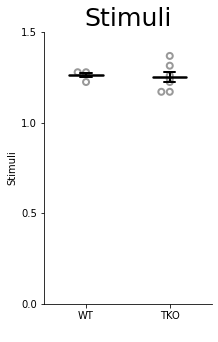

In [ ]:
column = "Stimuli"
# 図の設定
fig, axis1 = plt.subplots(1, 1, sharey=True)
fig.set_size_inches(3, 5)
sns.set(style="ticks")
paper_rc = {'lines.linewidth': 1.3, 'lines.markersize': 5}                  
sns.set_context("talk",font_scale=1.4, rc = paper_rc) 

# プロットする行を指定
y_name = column

# プロット

sns.swarmplot(x="Genotype",order=['WT','TKO'],y=y_name,data=df,
                 size=6,edgecolor="gray",linewidth=2, color='white',ax=axis1,zorder=0)

# WT mean, semバー
WT_mean = df_WT_summary.loc['mean',y_name]
WT_sem = df_WT_summary.loc['sem',y_name]
plot_mean_sem_bar(axis1,0,WT_mean,WT_sem)

# TKO mean, semバー
TKO_mean = df_TKO_summary.loc['mean',y_name]
TKO_sem = df_TKO_summary.loc['sem',y_name]
plot_mean_sem_bar(axis1,1,TKO_mean,TKO_sem)
axis1.set_ylim(0,1.5)


axis1.set_title(y_name) # タイトル
axis1.set_xlabel(' ')  # xラベル消去

sns.despine() # 枠の消去

# 保存
filename = test_name + '_' + y_name
for s in ['/','.',' ']:
    filename = filename.replace(s,'_')
fig.savefig(os.path.join(savefig_dir,filename+'.pdf'),bbox_inches="tight")
fig.savefig(os.path.join(savefig_dir,filename+'.jpg'),bbox_inches="tight")


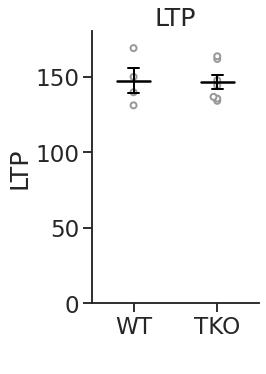

In [ ]:
column = "LTP"
# 図の設定
fig, axis1 = plt.subplots(1, 1, sharey=True)
fig.set_size_inches(3, 5)
sns.set(style="ticks")
paper_rc = {'lines.linewidth': 1.3, 'lines.markersize': 5}                  
sns.set_context("talk",font_scale=1.4, rc = paper_rc) 

# プロットする行を指定
y_name = column

# プロット

sns.swarmplot(x="Genotype",order=['WT','TKO'],y=y_name,data=df,
                 size=6,edgecolor="gray",linewidth=2, color='white',ax=axis1,zorder=0)

# WT mean, semバー
WT_mean = df_WT_summary.loc['mean',y_name]
WT_sem = df_WT_summary.loc['sem',y_name]
plot_mean_sem_bar(axis1,0,WT_mean,WT_sem)

# TKO mean, semバー
TKO_mean = df_TKO_summary.loc['mean',y_name]
TKO_sem = df_TKO_summary.loc['sem',y_name]
plot_mean_sem_bar(axis1,1,TKO_mean,TKO_sem)
axis1.set_ylim(0,180)


axis1.set_title(y_name) # タイトル
axis1.set_xlabel(' ')  # xラベル消去

sns.despine() # 枠の消去

# 保存
filename = test_name + '_' + y_name
for s in ['/','.',' ']:
    filename = filename.replace(s,'_')
fig.savefig(os.path.join(savefig_dir,filename+'.pdf'),bbox_inches="tight")
fig.savefig(os.path.join(savefig_dir,filename+'.jpg'),bbox_inches="tight")


### 時系列プロット

In [ ]:
# mean,semのバーを表示する関数
# ax: figure
# x: 表示する位置
def plot_mean_sem_bar(ax,x,mean,sem,length=None,linewidth=None,):
    if length ==None:
        length = 0.2
    
    if linewidth ==None:
        linewidth = 2
    
    mean_line = plt.Line2D((x-length, x+length),(mean,mean),lw=2.5,color='black')
    sem_line_t = plt.Line2D((x-length/3,x+length/3),(mean+sem,mean+sem),lw=linewidth,color='black')
    sem_line_b = plt.Line2D((x-length/3,x+length/3),(mean-sem,mean-sem),lw=linewidth,color='black')
    v_line = plt.Line2D((x,x),(mean-sem,mean+sem),lw=linewidth,color='black')

    ax.add_line(mean_line)
    ax.add_line(sem_line_t)
    ax.add_line(sem_line_b)
    ax.add_line(v_line)

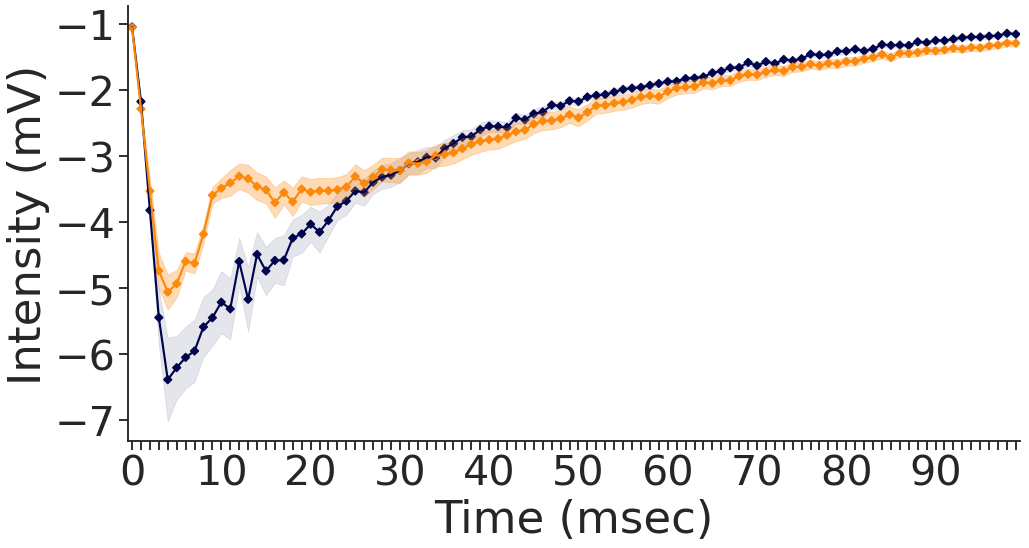

In [ ]:
WT_color = '#00044d'
TKO_color = '#fc890c'

fig, ax = plt.subplots(1,1, sharey=True) 
fig.set_size_inches(16, 8)
sns.set(style="ticks")
paper_rc = {'lines.linewidth': 1.2, 'lines.markersize': 5}                  
sns.set_context("paper",font_scale=2.5, rc = paper_rc)


y_name= 'tetanus'
ax= sns.pointplot(x='Time',y="WT_average",data=tetanus_df,
              ci=68,
                  color =WT_color,
              markers = ['D'],
             capsize=0.1)

ax.fill_between(tetanus_df["Time"]/100,
                tetanus_df["WT_average"]+tetanus_df["WT_sem"],
                tetanus_df["WT_average"]-tetanus_df["WT_sem"],
               color= WT_color,
               alpha=0.1)

ax.fill_between(tetanus_df["Time"]/100,
                tetanus_df["TKO_average"]+tetanus_df["TKO_sem"],
                tetanus_df["TKO_average"]-tetanus_df["TKO_sem"],
               color= TKO_color,
               alpha=0.3)

ax= sns.pointplot(x='Time',y="TKO_average",data=tetanus_df,
              ci=68,
                  color = TKO_color,
              markers = ['D'],
             capsize=0.3)

x_list = []
for i in range(0,100):
    if i%10 == 0:
        x_list.append(i)
    else:
        x_list.append(' ')

ax.set_xticklabels(x_list)
ax.set_xlabel('Time (msec)')
ax.set_ylabel('Intensity (mV)')



sns.despine()
    
filename = test_name+y_name
[filename.replace(s,'_') for s in ['/',' ']]
    
fig.savefig(os.path.join(savefig_dir,filename)+'.jpg',bbox_inches="tight")
fig.savefig(os.path.join(savefig_dir,filename)+'.pdf',bbox_inches="tight")

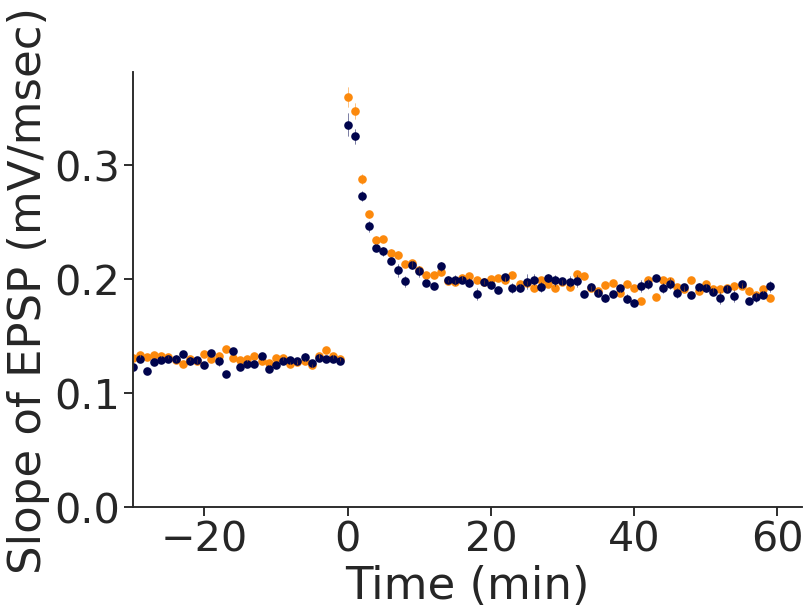

In [ ]:
WT_color = '#00044d'
TKO_color = '#fc890c'

fig, ax = plt.subplots(1,1, sharey=True) 
fig.set_size_inches(12, 8)
sns.set(style="ticks")
paper_rc = {'lines.linewidth': 1.2, 'lines.markersize': 5}                  
sns.set_context("talk",font_scale=2.5, rc = paper_rc)


y_name= 'slope'



t = slope_df['Time']
wt_top = slope_df['WT_average'].values + slope_df['WT_sem'].values
wt_bottom = slope_df['WT_average'].values - slope_df['WT_sem'].values
tko_top = slope_df['TKO_average'].values + slope_df['TKO_sem'].values
tko_bottom = slope_df['TKO_average'].values - slope_df['TKO_sem'].values

ax.scatter(x=slope_df['Time'],y=slope_df['TKO_average'],s=50,c=TKO_color,marker="o")
for i in range(90):
    v_line = plt.Line2D((t[i],t[i]),
                        (tko_bottom[i],tko_top[i]),lw=0.5,color=TKO_color)
    ax.add_line(v_line)

ax.scatter(x=slope_df['Time'],y=slope_df['WT_average'],s=50,c=WT_color)


for i in range(90):
    v_line = plt.Line2D((t[i],t[i]),
                        (wt_bottom[i],wt_top[i]),lw=0.5,color=WT_color)
    ax.add_line(v_line)

ax.set_xlabel('Time (min)')
ax.set_ylabel('Slope of EPSP (mV/msec)')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=-30)
sns.despine()

filename = test_name+y_name
[filename.replace(s,'_') for s in ['/',' ']]
    
fig.savefig(os.path.join(savefig_dir,filename)+'.png',bbox_inches="tight")
fig.savefig(os.path.join(savefig_dir,filename)+'.pdf',bbox_inches="tight")

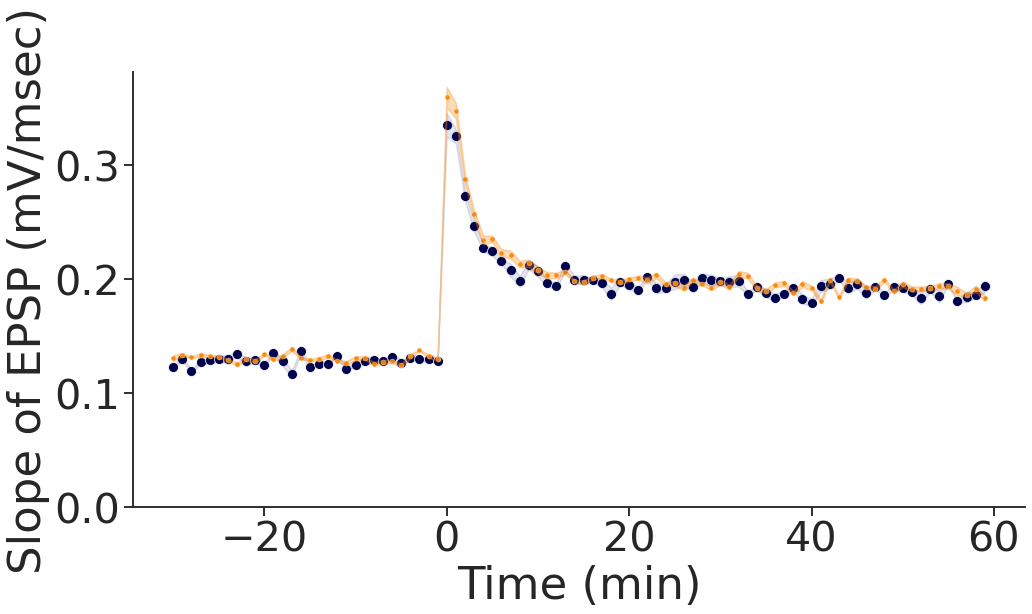

In [ ]:
WT_color = '#00044d'
TKO_color = '#fc890c'

fig, ax = plt.subplots(1,1, sharey=True) 
fig.set_size_inches(16, 8)
sns.set(style="ticks")
paper_rc = {'lines.linewidth': 1.2, 'lines.markersize': 5}                  
sns.set_context("talk",font_scale=2.5, rc = paper_rc)


y_name= 'slope'


sns.scatterplot(x='Time',y="WT_average",data=slope_df,
            s =100,
                  color =WT_color,
                markers = ['D'],
                ax=ax)

sns.scatterplot(x='Time',y="TKO_average",data=slope_df,
            color = TKO_color,
              markers = ['D'],
              ax=ax)

ax.fill_between(slope_df["Time"],
                slope_df["WT_average"]+slope_df["WT_sem"],
                slope_df["WT_average"]-slope_df["WT_sem"],
               color= WT_color,
               alpha=0.1)

ax.fill_between(slope_df["Time"],
                slope_df["TKO_average"]+slope_df["TKO_sem"],
                slope_df["TKO_average"]-slope_df["TKO_sem"],
               color= TKO_color,
               alpha=0.3)
# x_list = []
# for i in range(-30,60,1):
#     if i%10 == 0:
#         x_list.append(i)
#     else:
#         x_list.append(' ')

# ax.set_xticklabels(x_list)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Slope of EPSP (mV/msec)')
ax.set_ylim(ymin=0)


sns.despine()
    
filename = test_name+y_name
[filename.replace(s,'_') for s in ['/',' ']]
    
fig.savefig(os.path.join(savefig_dir,filename)+'.png',bbox_inches="tight")
fig.savefig(os.path.join(savefig_dir,filename)+'.pdf',bbox_inches="tight")

In [ ]:
slope_df["Time"].values

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59])

# 統計解析

In [ ]:
from scipy import stats

In [ ]:
stats_df = pd.concat([df_WT_summary,df_TKO_summary])
stats_df = stats_df.round(1)

## One way ANOVA

In [ ]:
p_list = []
for col in column_list:
    try:
        t,p = stats.f_oneway(df.query('Genotype == "WT"').ix[:,col],
                              df.query('Genotype == "DKO"').ix[:,col],
                              df.query('Genotype == "TKO"').ix[:,col])
    except:
        p='NaN'
    p_list.append(p)
stats_df = pd.append(stats_df, pd.DataFrame(p_list,columns=['One_way_ANOVA'],index=column_list).T)

stats_df

AttributeError: ignored

In [ ]:
p_list

['NaN', 'NaN', 'NaN', 'NaN', 'NaN']